In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/KERATOCONUS DATASET/Train_Validation sets/Train_Validation sets'
test_path = '/content/drive/MyDrive/KERATOCONUS DATASET/Independent Test Set/Independent Test Set'

IMAGE_SIZE = [224, 224] #Default image size for VGG16

folders = glob('/content/drive/MyDrive/KERATOCONUS DATASET/Train_Validation sets/Train_Validation sets/*') #Get number of classes


# ImageDataGenerator can help perform augumentation on existing images. This way, we get more diverse train set.
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

#Through flow_from_directory - we create an array of images that can be used for training.
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/KERATOCONUS DATASET/Train_Validation sets/Train_Validation sets',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/KERATOCONUS DATASET/Independent Test Set/Independent Test Set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2961 images belonging to 3 classes.
Found 1050 images belonging to 3 classes.


In [ ]:
# Create a VGG19 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have.
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# This sets the base that the layers are not trainable. If we'd want to train the layers with custom data, these two lines can be ommitted.
for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output) #Output obtained on vgg16 is now flattened.
prediction = Dense(len(folders), activation='softmax')(x) # We have 5 classes, and so, the prediction is being done on len(folders) - 5 classes

#Creating model object
model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# Load VGG-19 model without the top (fully connected) layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
# Add a global average pooling layer (reducing spatial dimensions in feature maps) and a fully connected layer for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [ ]:
# Create the final model with the added layers
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Assuming you have image data for training and validation
# Replace this with your own data and labels
# X_train and X_val should be the images (numpy arrays)
# y_train and y_val should be the corresponding labels

# Train the model and store the training history
# Replace X_train, y_train, X_val, and y_val with your actual data
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

In [ ]:
# Example:
X_train = np.random.rand(100, 224, 224, 3)  # Example random data for X_train
y_train = np.random.randint(2, size=(100,))  # Example random data for y_train
X_val = np.random.rand(20, 224, 224, 3)      # Example random data for X_val
y_val = np.random.randint(2, size=(20,))      # Example random data for y_val
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
4/4 [==============================] - 254s 57s/step - loss: 3.2889 - accuracy: 0.5200 - val_loss: 0.7187 - val_accuracy: 0.4500
Epoch 2/10
4/4 [==============================] - 239s 56s/step - loss: 0.7970 - accuracy: 0.5600 - val_loss: 0.6885 - val_accuracy: 0.5500
Epoch 3/10
4/4 [==============================] - 251s 60s/step - loss: 0.7164 - accuracy: 0.4400 - val_loss: 0.6999 - val_accuracy: 0.4500
Epoch 4/10
4/4 [==============================] - 248s 58s/step - loss: 0.6922 - accuracy: 0.5600 - val_loss: 0.7391 - val_accuracy: 0.4500
Epoch 5/10
4/4 [==============================] - 240s 57s/step - loss: 0.6928 - accuracy: 0.5600 - val_loss: 0.7569 - val_accuracy: 0.4500
Epoch 6/10
4/4 [==============================] - 245s 58s/step - loss: 0.7019 - accuracy: 0.5600 - val_loss: 0.7777 - val_accuracy: 0.4500
Epoch 7/10
4/4 [==============================] - 242s 57s/step - loss: 0.7093 - accuracy: 0.5600 - val_loss: 0.7292 - val_accuracy: 0.4500
Epoch 8/10
4/4 [====

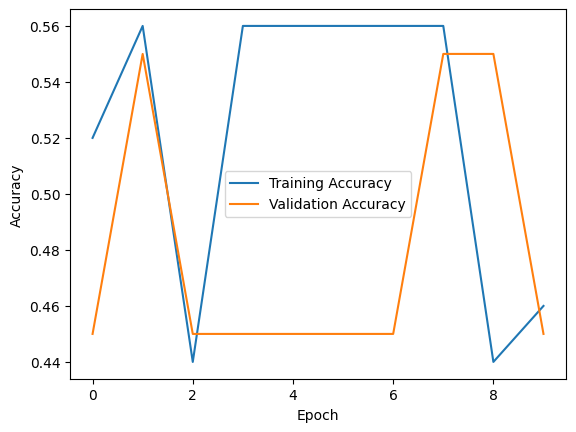

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

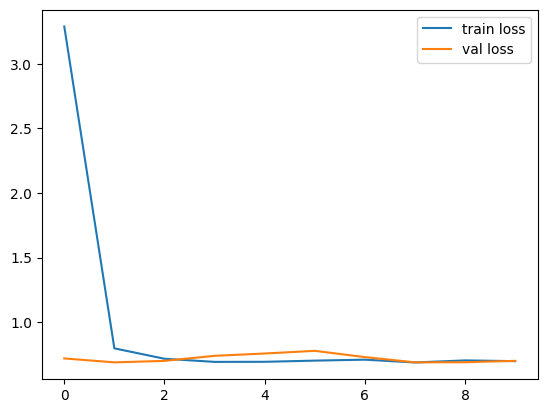

<Figure size 640x480 with 0 Axes>

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

**Visualizing a batch of images**

In [ ]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
tf.__version__

'2.15.0'

In [ ]:
train_path = '/content/drive/MyDrive/KERATOCONUS DATASET/Train_Validation sets/Train_Validation sets'
test_path = '/content/drive/MyDrive/KERATOCONUS DATASET/Independent Test Set/Independent Test Set'
Name0=os.listdir(train_path)
Name=sorted(Name0)
n=len(Name)
N=list(range(n))
normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

In [ ]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(
                            #rotation_range=90,
                            brightness_range=(0.5,1),
                            #shear_range=0.2,
                            #zoom_range=0.2,
                            channel_shift_range=0.2,
                            horizontal_flip=False,
                            vertical_flip=False,
                            rescale=1./255,
                            validation_split=0.3)

In [ ]:
root_dir = '/content/drive/MyDrive/KERATOCONUS DATASET/Train_Validation sets/Train_Validation sets'
test_path = '/content/drive/MyDrive/KERATOCONUS DATASET/Independent Test Set/Independent Test Set'
img_generator_flow_train = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="training")

img_generator_flow_valid = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="validation")

Found 2073 images belonging to 3 classes.
Found 888 images belonging to 3 classes.


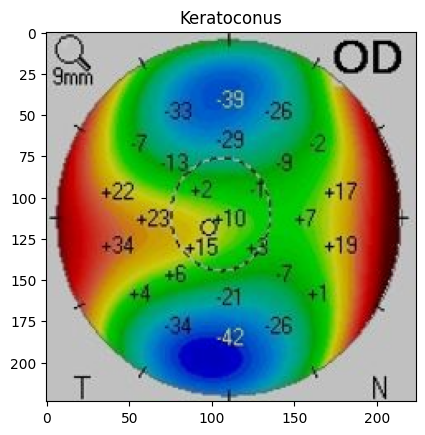

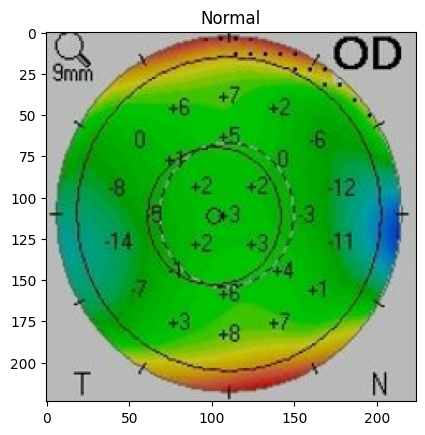

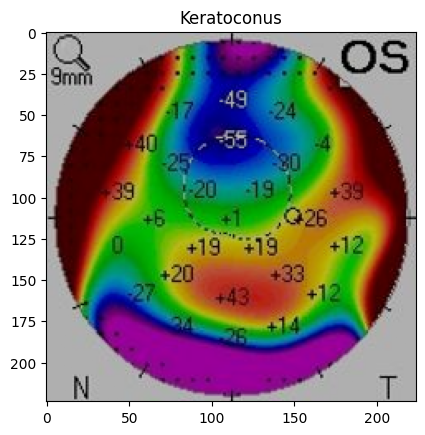

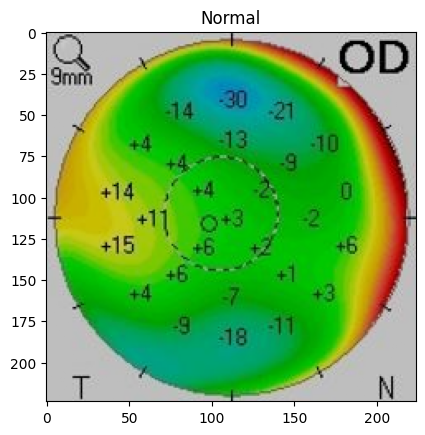

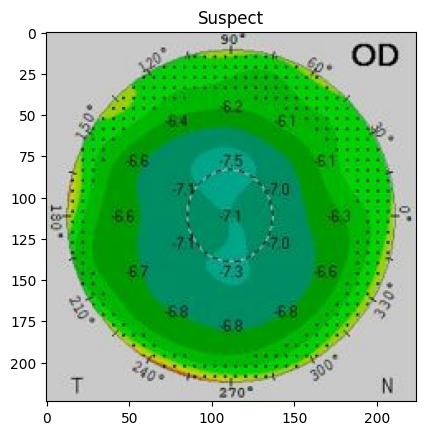

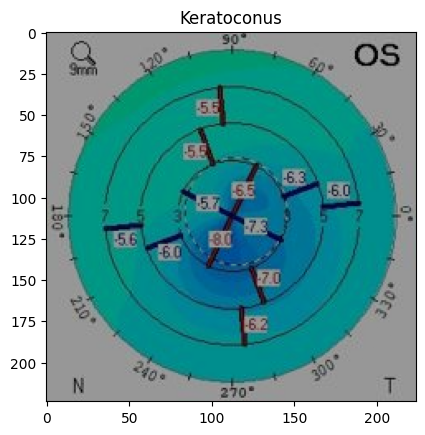

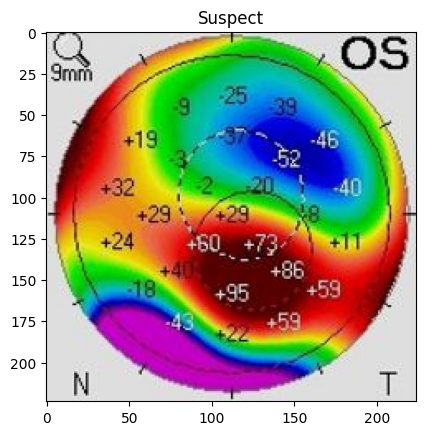

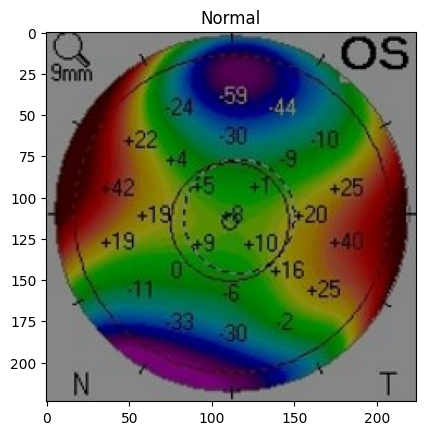

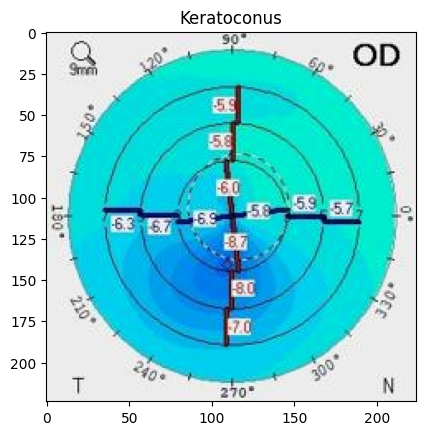

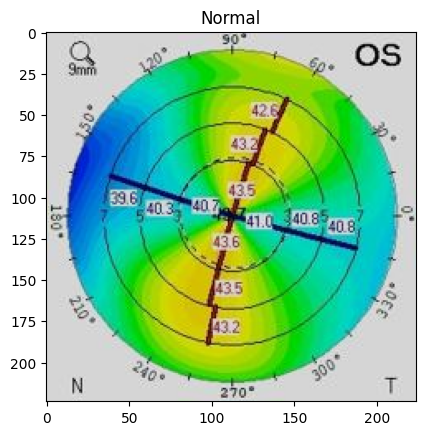

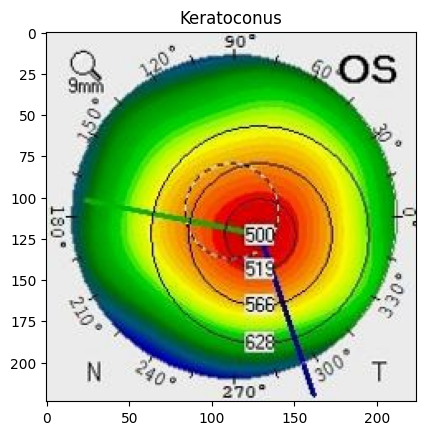

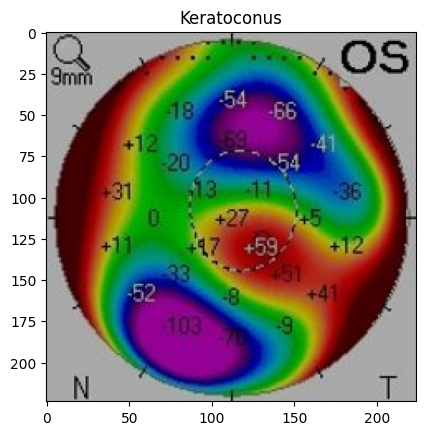

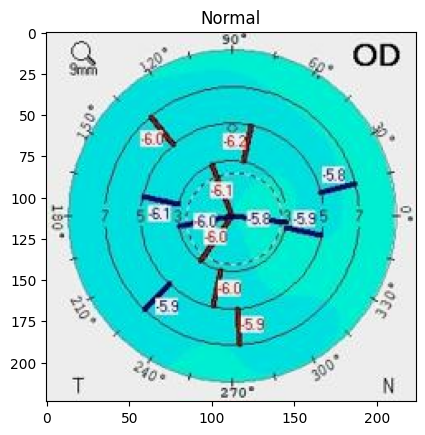

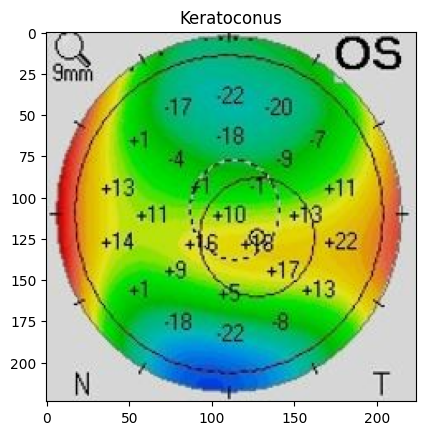

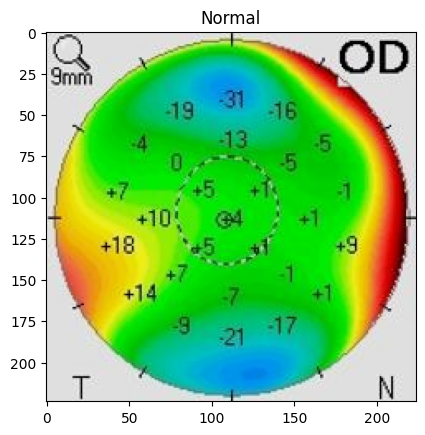

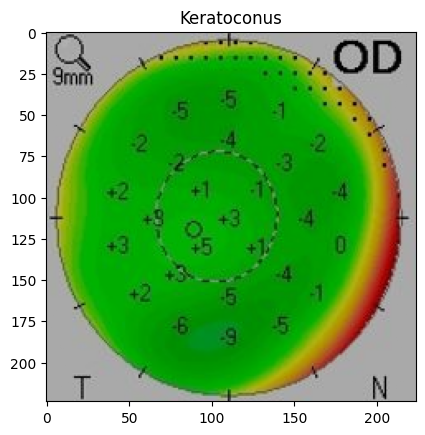

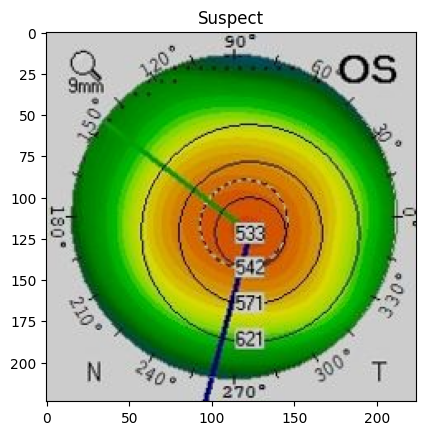

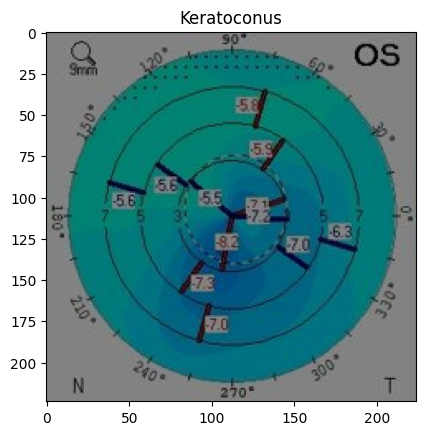

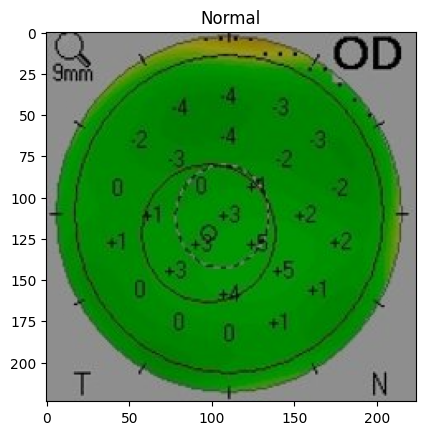

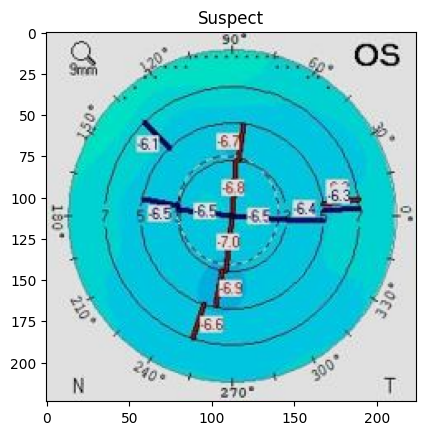

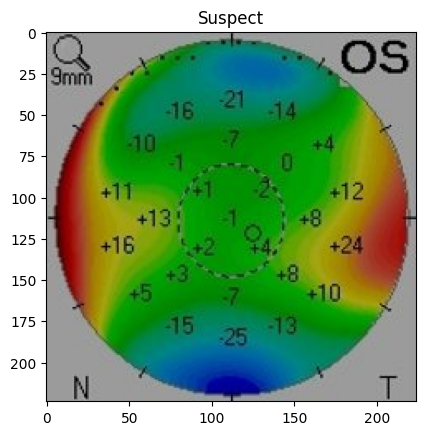

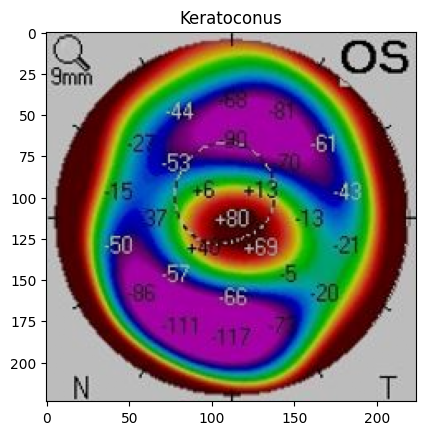

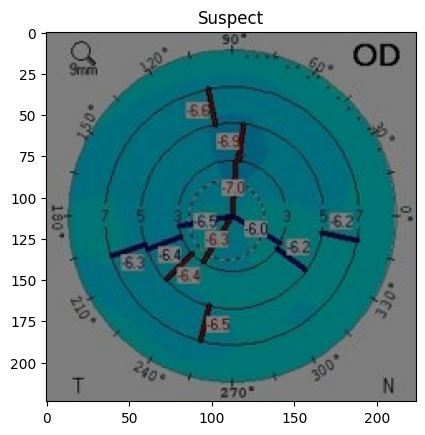

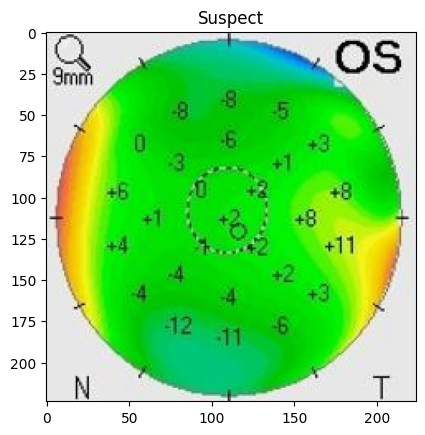

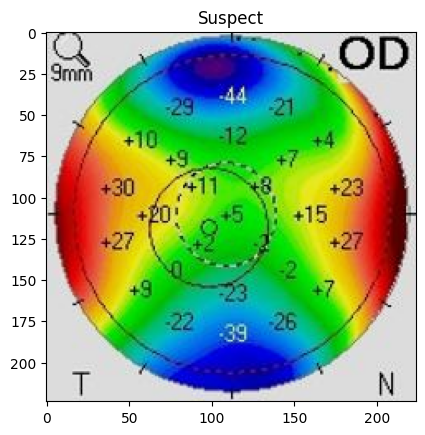

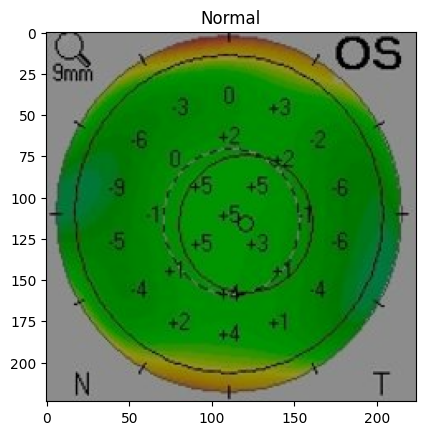

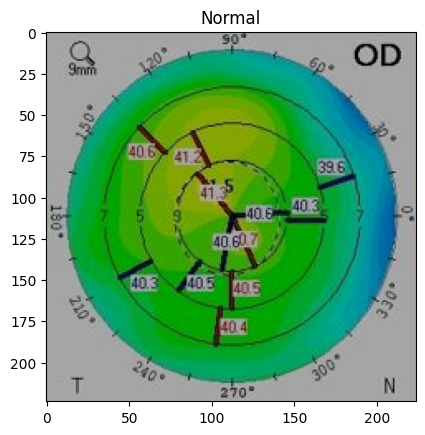

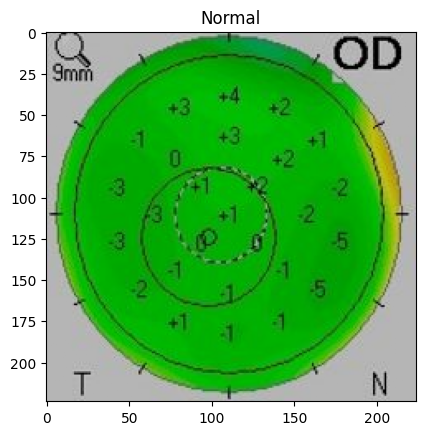

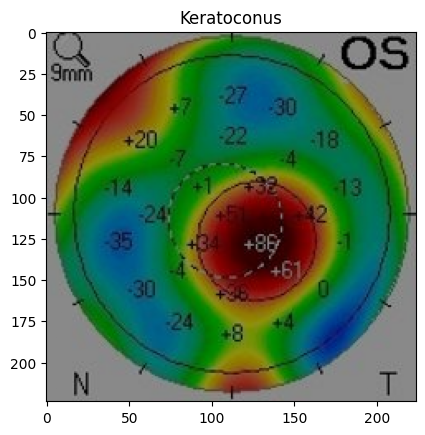

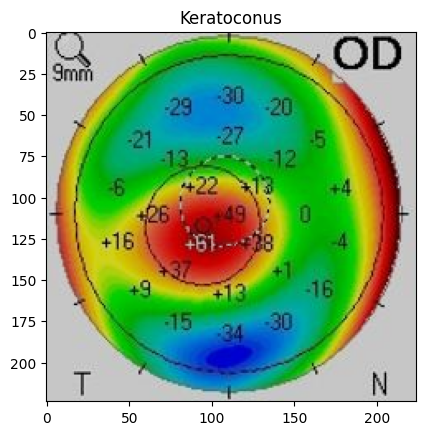

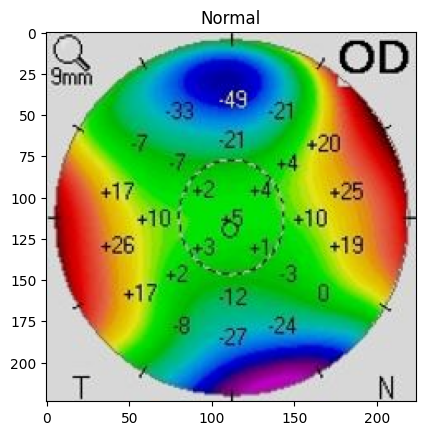

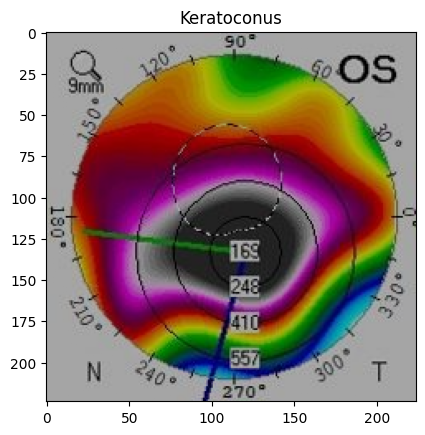

In [ ]:
imgs, labels = next(iter(img_generator_flow_train))
for img, label in zip(imgs, labels):
    value=np.argmax(label)
    plt.imshow(img)
    plt.title(reverse_mapping[value])
    plt.show()